In [150]:
##Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [151]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [152]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [153]:
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [154]:
df.sample()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
4547,4547,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Rent,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,1


In [155]:
df.shape

(26707, 34)

In [156]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [158]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [159]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [160]:
df.drop(['unique_id'],axis=1,inplace=True)

In [161]:
duplicate=df.duplicated()
duplicate.sum()

4

In [162]:
df.drop_duplicates(inplace=True)

In [163]:
duplicate=df.duplicated()
duplicate.sum()

0

In [164]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12272
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [165]:
df.shape

(26703, 33)

In [166]:
df.drop(['has_health_insur'],axis=1,inplace=True)

<Axes: xlabel='sex', ylabel='count'>

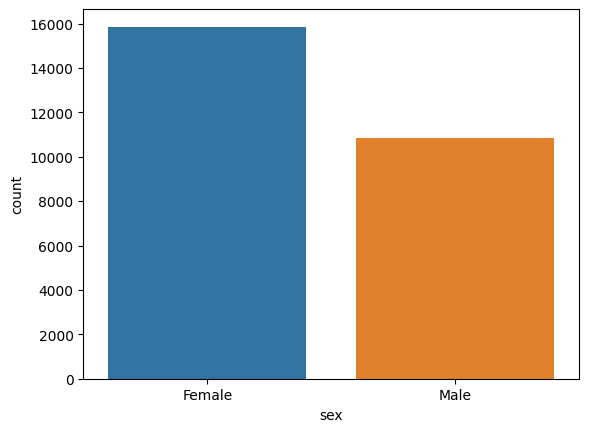

In [167]:
sns.countplot(x='sex',data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

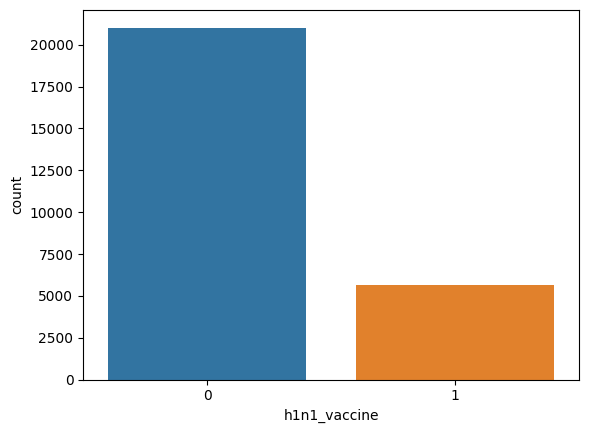

In [168]:
sns.countplot(x='h1n1_vaccine',data=df)

In [169]:
df.dropna(inplace=True)

In [170]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19638 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19638 non-null  float64
 1   h1n1_awareness             19638 non-null  float64
 2   antiviral_medication       19638 non-null  float64
 3   contact_avoidance          19638 non-null  float64
 4   bought_face_mask           19638 non-null  float64
 5   wash_hands_frequently      19638 non-null  float64
 6   avoid_large_gatherings     19638 non-null  float64
 7   reduced_outside_home_cont  19638 non-null  float64
 8   avoid_touch_face           19638 non-null  float64
 9   dr_recc_h1n1_vacc          19638 non-null  float64
 10  dr_recc_seasonal_vacc      19638 non-null  float64
 11  chronic_medic_condition    19638 non-null  float64
 12  cont_child_undr_6_mnths    19638 non-null  float64
 13  is_health_worker           19638 non-null  flo

In [172]:
df=df.drop(['housing_status','employment'],axis=1)

In [173]:
df=pd.get_dummies(df,columns=['age_bracket','qualification','race','sex','income_level','marital_status','census_msa'])

In [174]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sex_Female,sex_Male,"income_level_<= $75,000, Above Poverty","income_level_> $75,000",income_level_Below Poverty,marital_status_Married,marital_status_Not Married,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,1,0,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,1,0,0,1,0,1,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,1,0,0,1,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19638 entries, 0 to 26706
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   h1n1_worry                              19638 non-null  float64
 1   h1n1_awareness                          19638 non-null  float64
 2   antiviral_medication                    19638 non-null  float64
 3   contact_avoidance                       19638 non-null  float64
 4   bought_face_mask                        19638 non-null  float64
 5   wash_hands_frequently                   19638 non-null  float64
 6   avoid_large_gatherings                  19638 non-null  float64
 7   reduced_outside_home_cont               19638 non-null  float64
 8   avoid_touch_face                        19638 non-null  float64
 9   dr_recc_h1n1_vacc                       19638 non-null  float64
 10  dr_recc_seasonal_vacc                   19638 non-null  fl

In [176]:
X=df.drop(['h1n1_vaccine'],axis=1)
y=df['h1n1_vaccine']

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [178]:
lr=LogisticRegression()

In [179]:
lr.fit(X_train,y_train)

LogisticRegression()

In [180]:
lr.score(X_train,y_train)

0.8352247926669577

In [181]:
lr.score(X_test,y_test)

0.8177189409368636

In [182]:
predictions=lr.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8177189409368636

In [184]:
from sklearn import metrics

<Axes: >

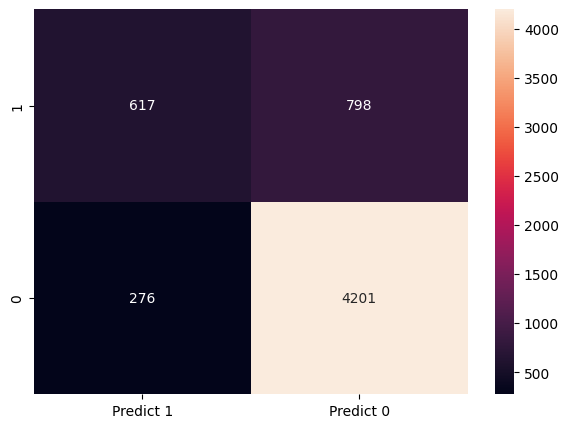

In [185]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                   columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
#fmt='g' is scientific notation 

In [186]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4477
           1       0.69      0.44      0.53      1415

    accuracy                           0.82      5892
   macro avg       0.77      0.69      0.71      5892
weighted avg       0.80      0.82      0.80      5892



In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
dt=DecisionTreeClassifier()

In [189]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [190]:
dt.score(X_train,y_train)

0.9998545031281827

In [191]:
dt.score(X_test,y_test)

0.7401561439239647

In [192]:
dt1=DecisionTreeClassifier(max_depth=3,criterion='entropy')

In [193]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [194]:
dt1.score(X_train,y_train)

0.8251127600756584

In [195]:
dt1.score(X_test,y_test)

0.810081466395112

In [196]:
from sklearn.ensemble import BaggingClassifier

In [197]:
bc=BaggingClassifier(n_estimators=30,base_estimator=dt1)

In [198]:
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  n_estimators=30)

In [199]:
bc.score(X_train,y_train)

0.8271497162811

In [200]:
bc.score(X_test,y_test)

0.8109300746775289

In [201]:
from sklearn.ensemble import AdaBoostClassifier


In [202]:
ad=AdaBoostClassifier()

In [203]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [204]:
ad.score(X_train,y_train)

0.8342790630001455

In [205]:
ad.score(X_test,y_test)

0.8177189409368636

In [206]:
from sklearn.ensemble import GradientBoostingClassifier

In [207]:
gb=GradientBoostingClassifier(n_estimators=1)

In [208]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=1)

In [209]:
gb.score(X_train,y_train)

0.7745525971191619

In [210]:
gb.score(X_test,y_test)

0.7598438560760353

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rd=RandomForestClassifier(n_estimators=200,max_features=10)

In [259]:
rd.fit(X_train,y_train)

RandomForestClassifier(max_features=10, n_estimators=200)

In [260]:
rd.score(X_train,y_train)

0.9998545031281827

In [261]:
rd.score(X_test,y_test)

0.8209436524100475

In [262]:
from sklearn.svm import SVC

In [263]:
sv=SVC()

In [264]:
sv.fit(X_train,y_train)

SVC()

In [265]:
sv.score(X_train,y_train)

0.8387894660264804

In [266]:
sv.score(X_test,y_test)

0.81653088934148